## Project - EDA

### By Archit Pandya

**Background:** This project contains data related to a Manufacturing company The dataset consists of different machines, production unit, with different shift times from different defect rates. As a Data Analyst, your task in hand is to find a suitable approach and solve the problems given.

**Problems for EDA dataset**

First basic overview of the dataset is performed and then each problem is individually addressed.

In [1]:
# Import necessary Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
# Read the data file and import as Pandas Dataframe

mfg_data = pd.read_csv('Manufacturing Dataset.csv')

## Basic Overview

In [3]:
mfg_data.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [4]:
mfg_data.shape

(3000, 20)

In [5]:
mfg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   3000 non-null   object 
 1   Date                            3000 non-null   object 
 2   Product Type                    3000 non-null   object 
 3   Machine ID                      3000 non-null   int64  
 4   Shift                           3000 non-null   object 
 5   Units Produced                  3000 non-null   int64  
 6   Defects                         2701 non-null   float64
 7   Production Time Hours           3000 non-null   float64
 8   Material Cost Per Unit          3000 non-null   float64
 9   Labour Cost Per Hour            3000 non-null   float64
 10  Energy Consumption kWh          3000 non-null   float64
 11  Operator Count                  3000 non-null   int64  
 12  Maintenance Hours               27

In [6]:
# Check for missing data

mfg_data.isnull().sum()

Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64

### Identify the datatypes of all variables and make relevant group by the data types

In [7]:
# Integer data types

mfg_data.select_dtypes(include = 'int64').dtypes

Machine ID               int64
Units Produced           int64
Operator Count           int64
Quality Checks Failed    int64
dtype: object

#### Summary:

*    All the variables can be best represented by the float variable

In [8]:
# Float data types

mfg_data.select_dtypes(include = 'float64').dtypes

Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

#### Summary:

*    All the variables can be best represented by the float variable

### Object Data Type

In [9]:
# Object data type

mfg_data.select_dtypes(include = 'object').dtypes

Production ID    object
Date             object
Product Type     object
Shift            object
dtype: object

#### Summary:

*    **Production ID**: Can be best represented by the 'objet' variable (_String data type is not supported by current version_)
*    **Date**: Can be converted into 'Datetime' variable
*    **Product Type**: Can be converted into 'Category' variable
*    **Shift**: Can be converted into 'Category' variable

In [10]:
### Convert Manufacturing 'Date' variable into Datetime and extract new columns from "Date"

mfg_data['Date'] = pd.to_datetime(mfg_data['Date'])

In [11]:
### Convert 'Product Type' and 'Shift' into Category data types

mfg_data['Product Type'] = mfg_data['Product Type'].astype('category')
mfg_data['Shift'] = mfg_data['Shift'].astype('category')

In [12]:
### Manufacturing dataframe after making above data type changes

mfg_data.dtypes

Production ID                             object
Date                              datetime64[ns]
Product Type                            category
Machine ID                                 int64
Shift                                   category
Units Produced                             int64
Defects                                  float64
Production Time Hours                    float64
Material Cost Per Unit                   float64
Labour Cost Per Hour                     float64
Energy Consumption kWh                   float64
Operator Count                             int64
Maintenance Hours                        float64
Down time Hours                          float64
Production Volume Cubic Meters           float64
Scrap Rate                               float64
Rework Hours                             float64
Quality Checks Failed                      int64
Average Temperature C                    float64
Average Humidity Percent                 float64
dtype: object

In [13]:
# Numberical group having Integer data type

numerical_group_int_lst = list(mfg_data.select_dtypes(include = ['int64']).dtypes.index)
mfg_data[numerical_group_int_lst].dtypes

Machine ID               int64
Units Produced           int64
Operator Count           int64
Quality Checks Failed    int64
dtype: object

In [14]:
# Numberical group having Float data type

numerical_group_float_lst = list(mfg_data.select_dtypes(include = ['float64']).dtypes.index)
mfg_data[numerical_group_float_lst].dtypes

Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

In [15]:
# Rearrange the float variables into smaller manageable subgroups for outlier analysis

mfg_time = ['Production Time Hours', 'Maintenance Hours', 'Down time Hours', 'Rework Hours']
mfg_def_scrap = ['Defects', 'Scrap Rate', 'Average Temperature C', 'Average Humidity Percent']
mfg_cost_hour = ['Material Cost Per Unit', 'Labour Cost Per Hour', 'Energy Consumption kWh', 
                 'Production Volume Cubic Meters']


In [16]:
# numberical group having both Integer and Float data types

numerical_group_lst = list(mfg_data.select_dtypes(include = ['int64','float64']).dtypes.index)
mfg_data[numerical_group_lst].dtypes

Machine ID                          int64
Units Produced                      int64
Defects                           float64
Production Time Hours             float64
Material Cost Per Unit            float64
Labour Cost Per Hour              float64
Energy Consumption kWh            float64
Operator Count                      int64
Maintenance Hours                 float64
Down time Hours                   float64
Production Volume Cubic Meters    float64
Scrap Rate                        float64
Rework Hours                      float64
Quality Checks Failed               int64
Average Temperature C             float64
Average Humidity Percent          float64
dtype: object

### Problems for EDA dataset

**1. Dealing with IQR using outlier**

- Calculate the Interquartile Range (IQR) for all the numerical columns and use the IQR to identify any potential outliers in these data points.

#### Outlier function to analyze numerical variables - Integer and Float

In [17]:
# Create Outlier function to analyze numerical values - Integer and Float variables

def fn_MFG_outliler (p_data, p_num_group_list, p_incude_outlier = True):
    """
    Function to analyze outliers for the supplied Manufacturing data.\n
    It takes both Integer and Float numbers, loops through it and plots\n\n 
    
    data: Manufacturing Numerical data that needs to be analyzed for outliers\n
    num_group_list: Group of continuous variable in a List form\n
    include_outlier: Boolean Identifier whether to include outliers. Defaults to True\n 
    """
    group_size = len(p_num_group_list)
    plt.figure(figsize = (group_size*7, 4), dpi=140)
    #col = 0
    quant_25 = 0.25
    quant_50 = 0.50
    quant_75 = 0.75
    
    # Loop through each numerical variable from the passing parameter list 
    for row, col in enumerate(p_num_group_list):
        
        #Calculate descriptive analysis
        quant25 = p_data[col].quantile(quant_25)
        quant50 = p_data[col].quantile(quant_50)
        quant75 = p_data[col].quantile(quant_75)
        
        # Define IQR, low and high whisker values
        IQR = quant75 - quant25
        med = p_data[col].median()
        whisker_low = quant25 - (1.5 * IQR)    
        whisker_high = quant75 + (1.5 * IQR)
        
        # Define top and bottom boundaries for top and bottom outliers
        outlier_low = len(p_data[col][p_data[col] < whisker_low])
        outlier_high = len(p_data[col][p_data[col] > whisker_high])
        
        #Based on Outlier value plot the distribution
        if p_incude_outlier == True:
            #print('Including Outlier')
            plt.subplot(1, group_size, row + 1)
            sns.boxplot(data = p_data[col], orient = 'v')
            plt.ylabel('{}'.format(col))
            plt.title('With Outllier\nIQR = {}; Median = {} \n 1st, 3rd Quartile = {};\n Outlier (low/high) = {} \n '.
                      format(round(IQR, 2), round(med, 2), (round(quant25, 2), round(quant75, 2)), 
                             (outlier_low, outlier_high), (round(quant25, 2), round(quant75, 2)), 
                             (outlier_low, outlier_high)))
    
        else:
            # Compute outliers using Min/Max whiskers
            p_data_minmax = p_data[p_num_group_list][:]
            p_data_minmax[col][p_data_minmax[col] > whisker_high] = whisker_high + 1
            p_data_minmax[col][p_data_minmax[col] < whisker_low] = whisker_low - 1
        
            #Plot without Outliers
            plt.subplot(1, group_size, row + 1)
            sns.boxplot(data = p_data_minmax[col], orient = 'v')
            plt.ylabel('{}'.format(col))
            
            plt.title('Min/Max Method\nIQR = {}; Median = {} \n 1st, 3rd Quartile = {};\n Outlier (low/high) = {} '.
                      format(round(IQR, 2), round(med, 2), (round(quant25, 2), round(quant75, 2)), 
                             (outlier_low, outlier_high)))
    

#### Analyze Integer list with outliers

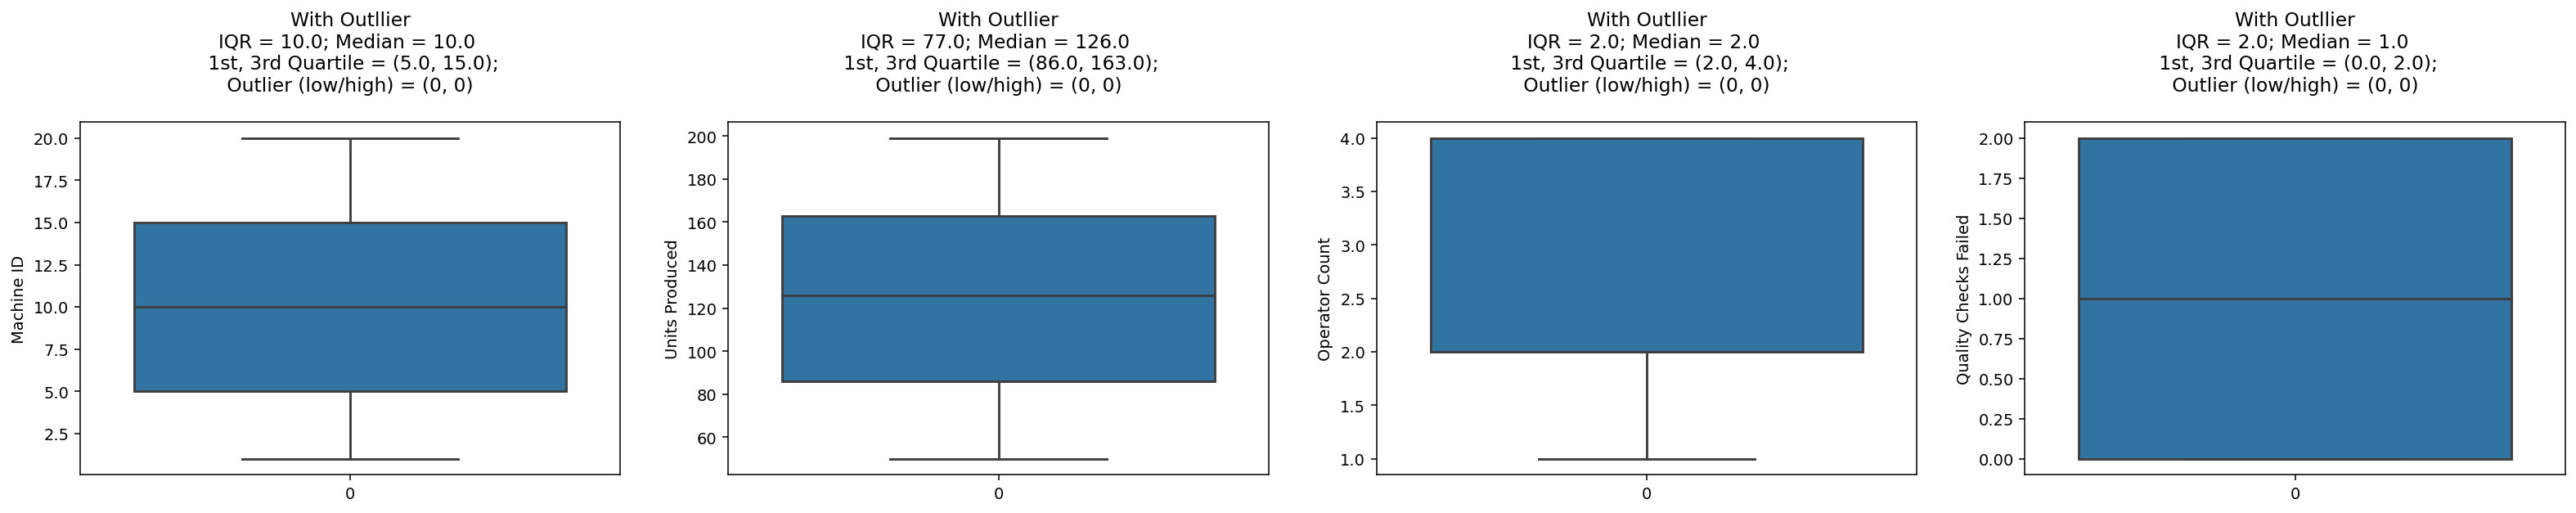

In [18]:
fn_MFG_outliler(mfg_data, numerical_group_int_lst,)

#### Analyze Integer list without outliers

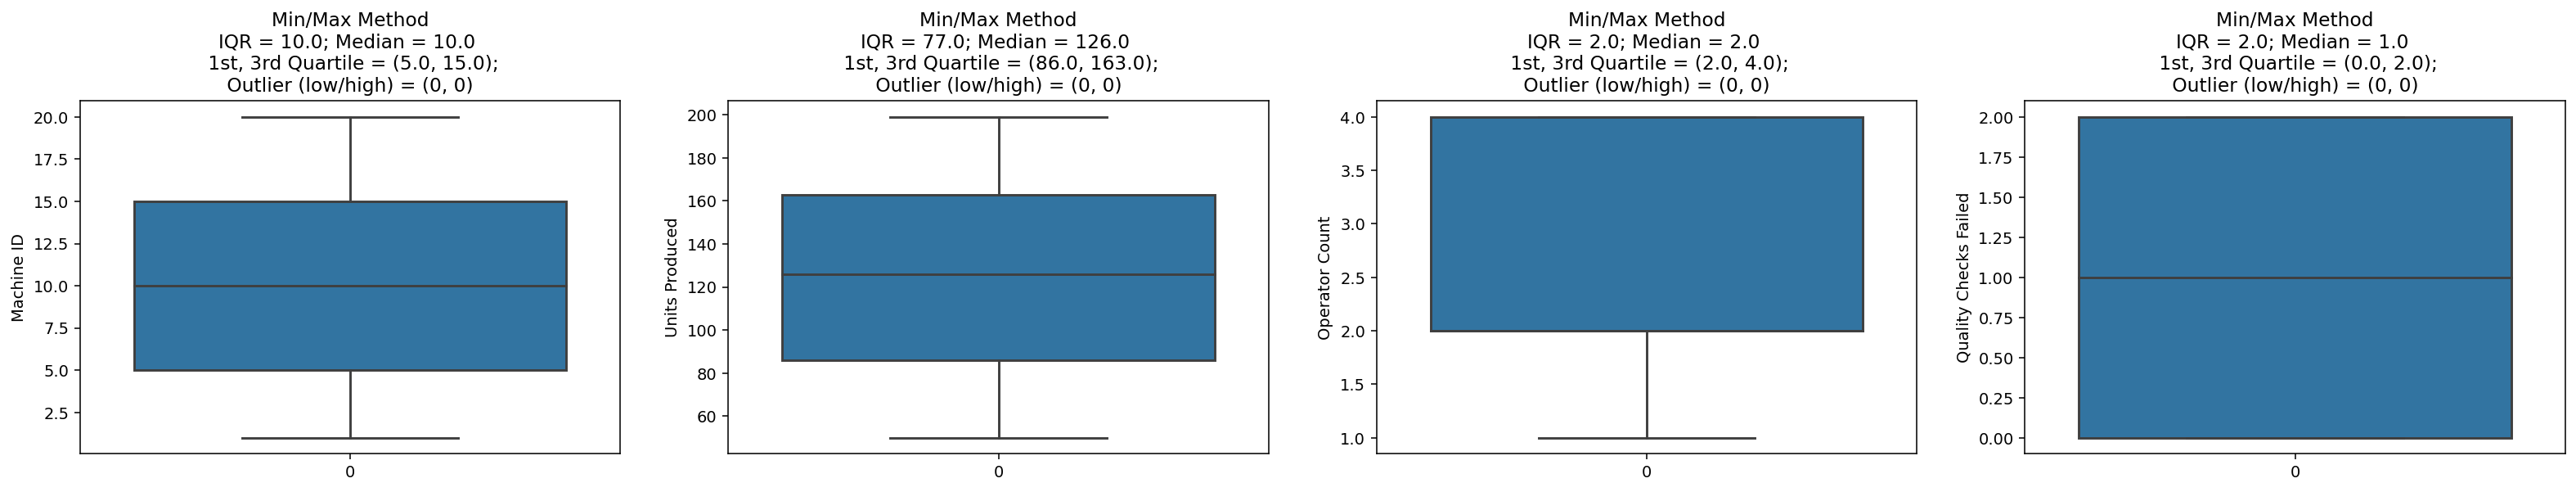

In [19]:
fn_MFG_outliler(mfg_data, numerical_group_int_lst, p_incude_outlier = False)

#### Inference

    * No outliers for Integer datatype group - numerical_group_int_list

#### Analyze Float list (mfg_time) with outliers

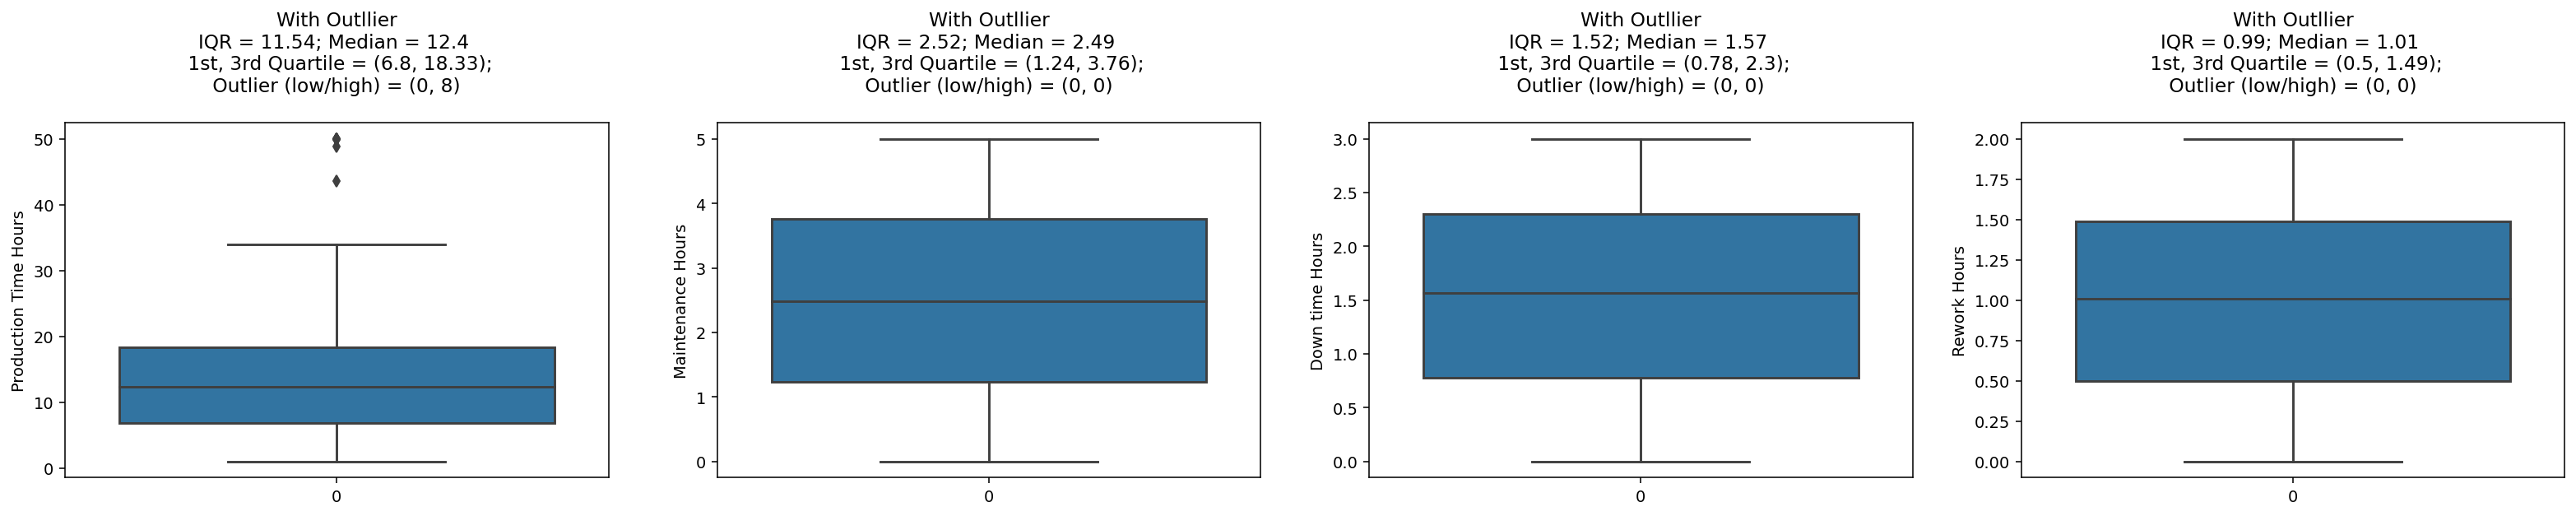

In [20]:
fn_MFG_outliler(mfg_data, mfg_time, )

#### Analze Float list (mfg_time) without outliers

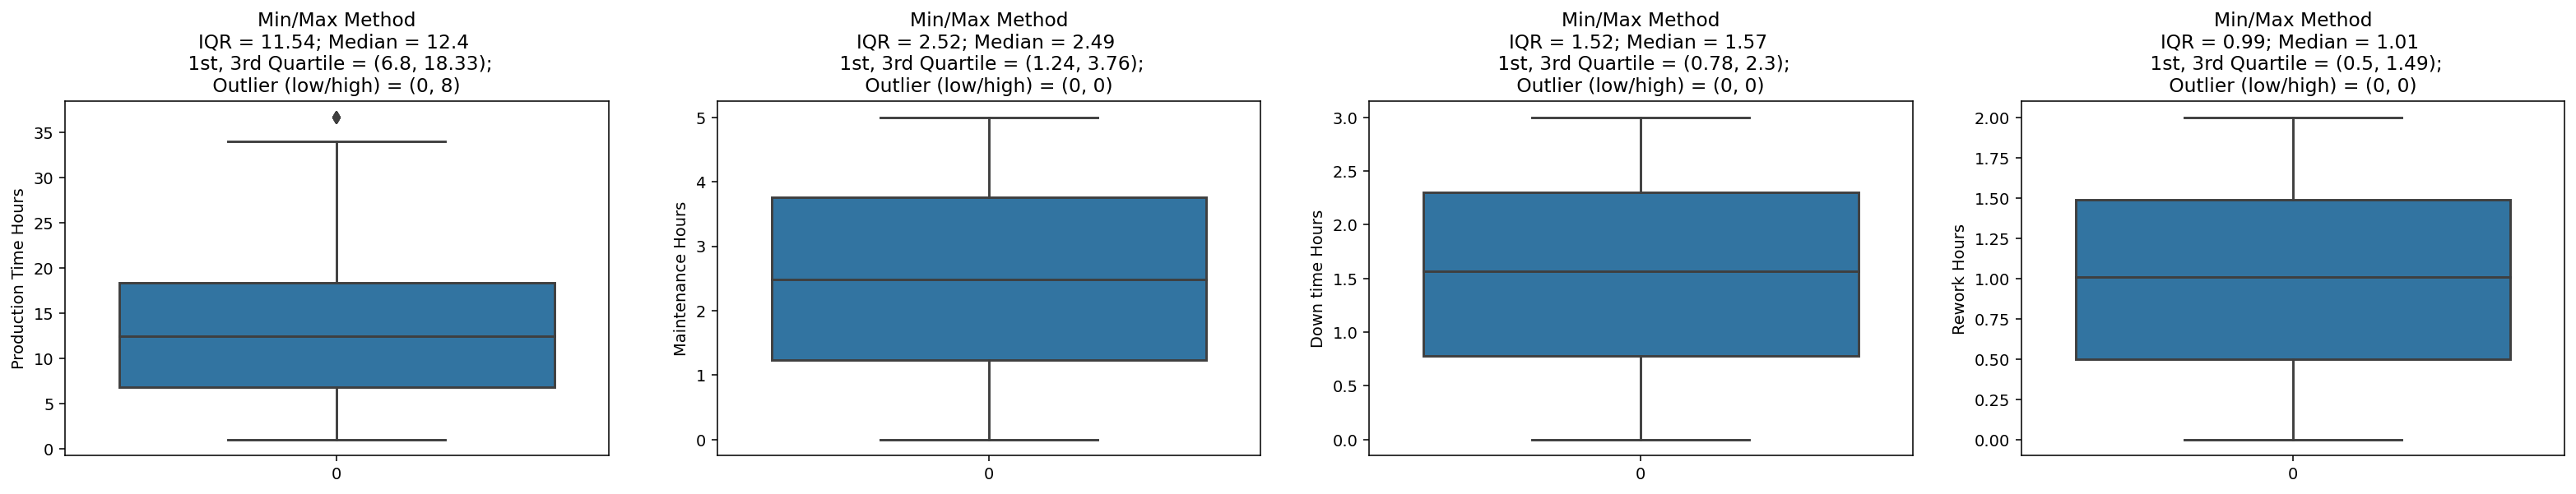

In [21]:
fn_MFG_outliler(mfg_data, mfg_time, p_incude_outlier = False)

#### Analyze Float list (mfg_def_scrap) with outliers

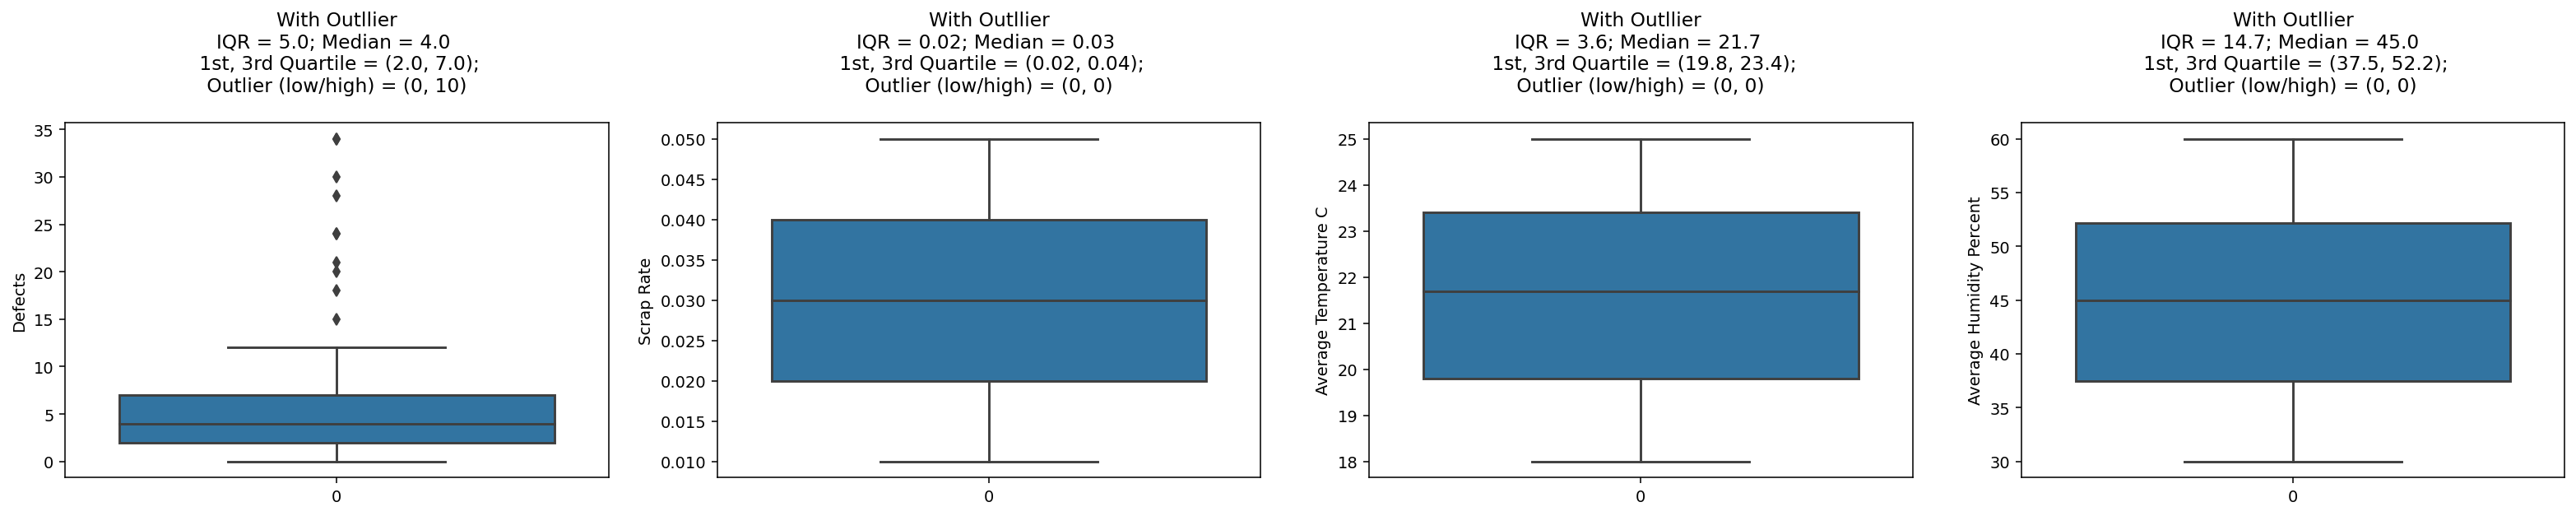

In [22]:
fn_MFG_outliler(mfg_data, mfg_def_scrap, )

#### Analyze Float list (mfg_def_scrap) without outliers

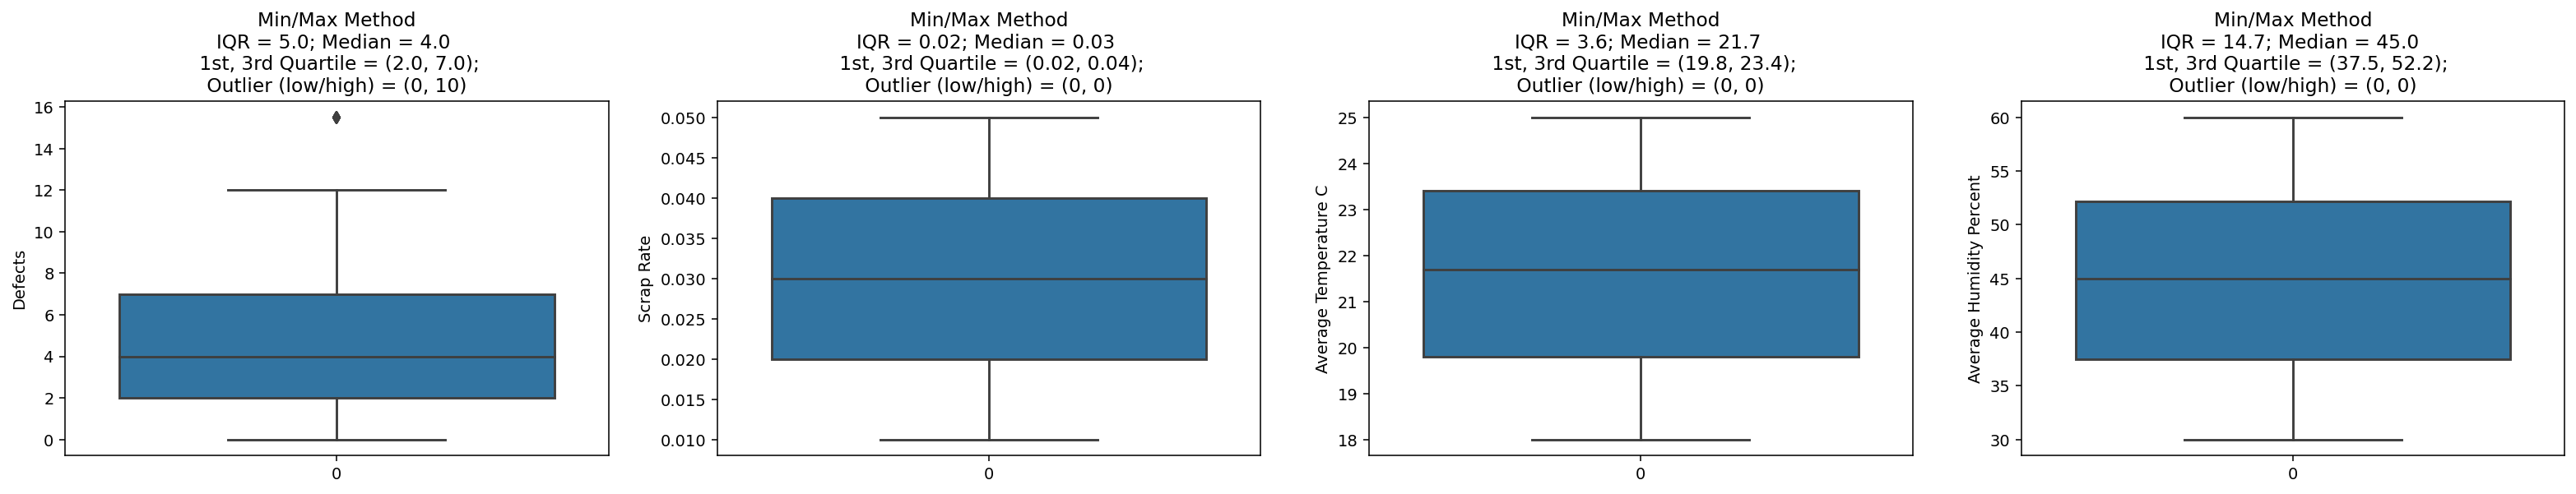

In [23]:
fn_MFG_outliler(mfg_data, mfg_def_scrap, p_incude_outlier = False)

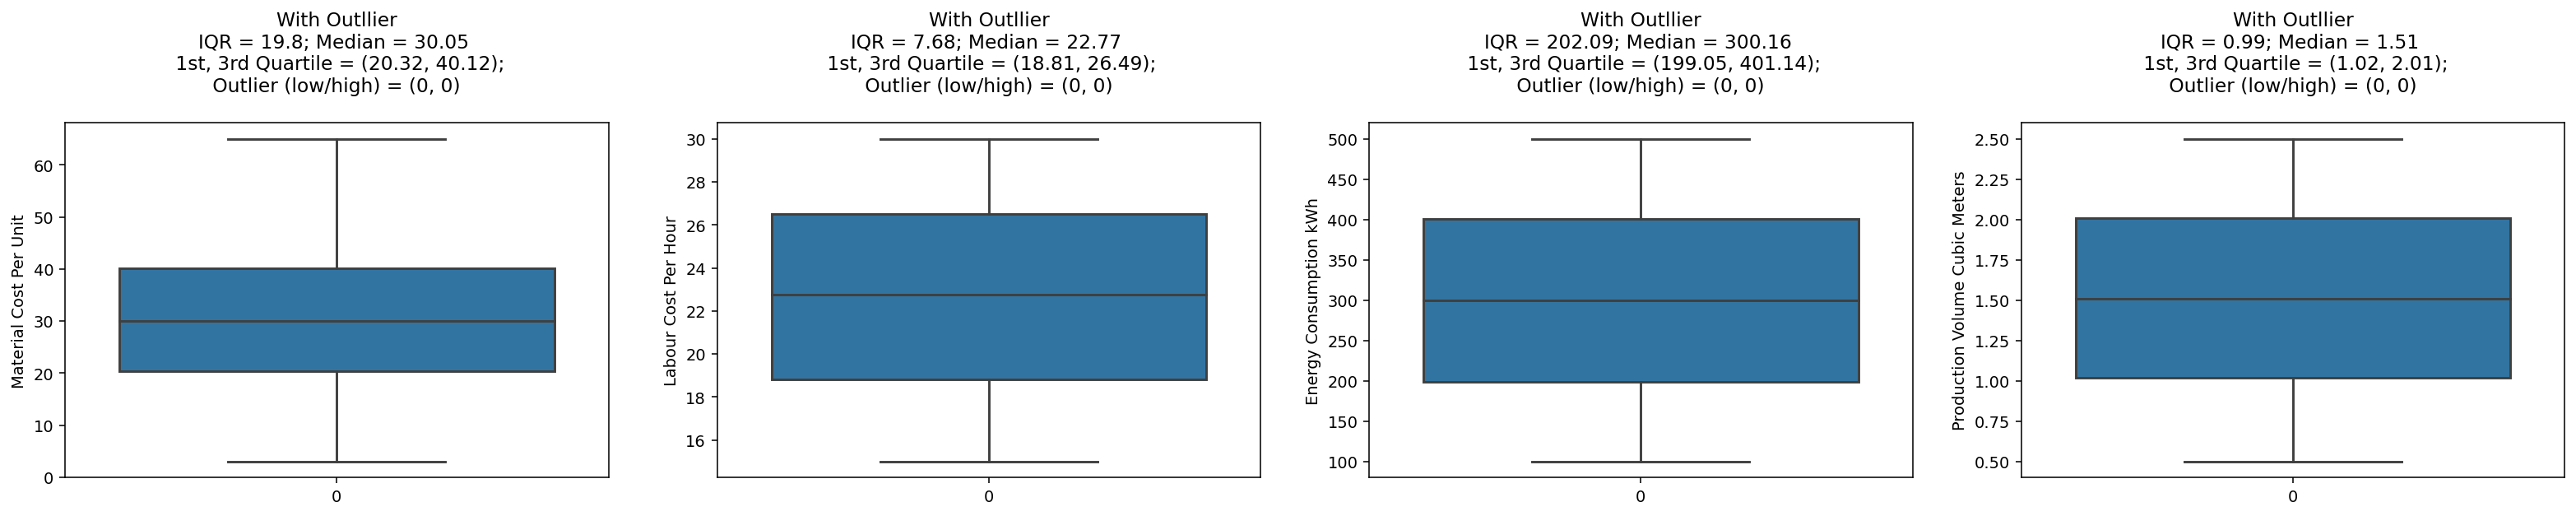

In [24]:
# Float list (mfg_def_scrap) to analyze with outliers

fn_MFG_outliler(mfg_data, mfg_cost_hour, )

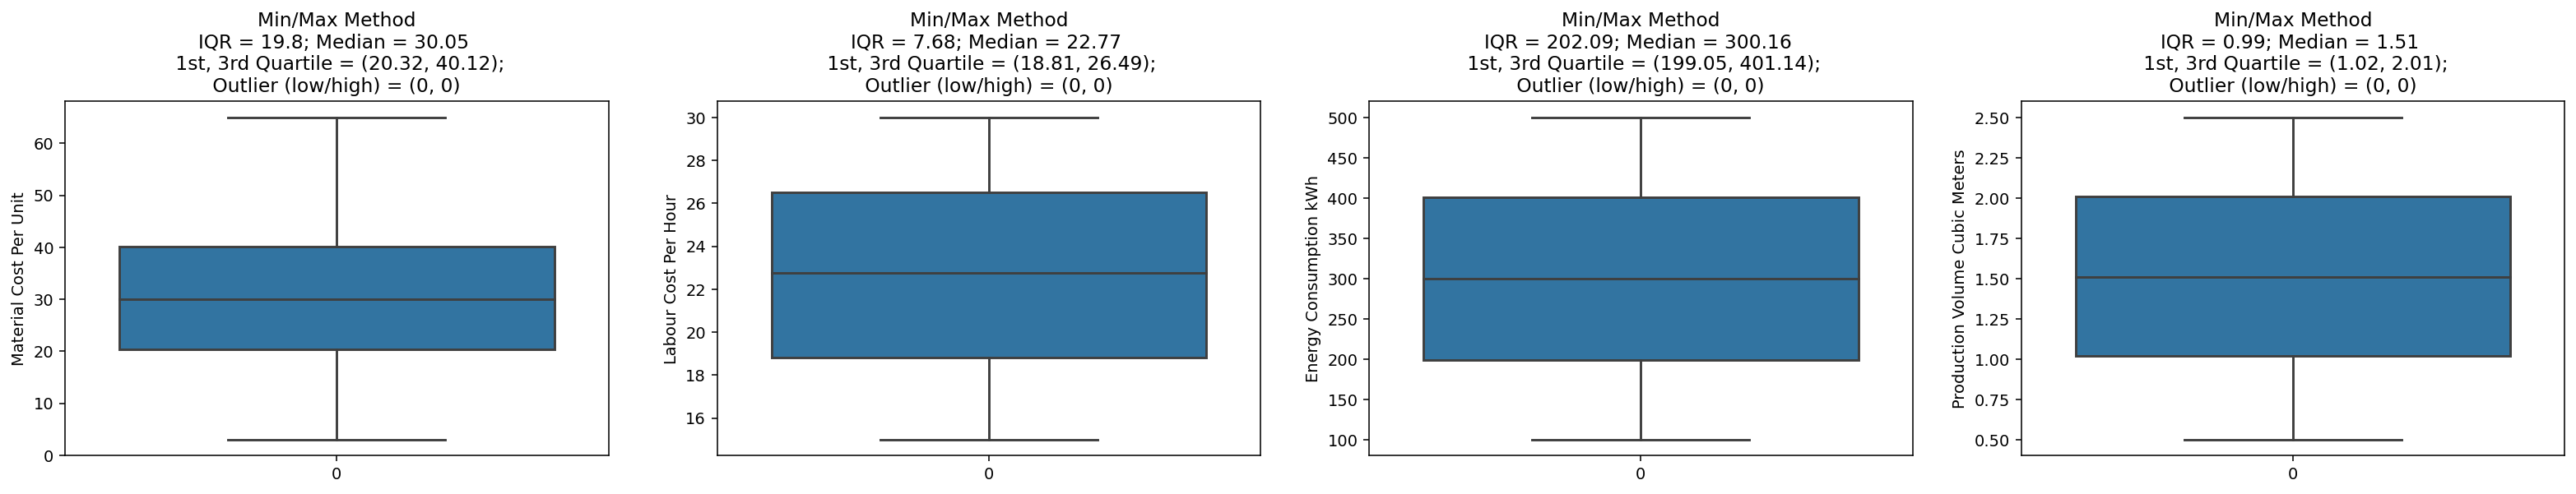

In [25]:
# Float list (mfg_def_scrap) to analyze without outliers

fn_MFG_outliler(mfg_data, mfg_cost_hour, p_incude_outlier = False)

#### Problems for EDA dataset**

**2. Identify Missing Values Across Key Production Metrics:**

Analyse the dataset to identify missing values across all the columns and calculate the total number of missing values for each of these columns. Describe your findings and then impute all the missing values with suitable data points.

In [26]:
# Before: showing missing values across all columns

mfg_data.isnull().sum()

Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 300
Down time Hours                   300
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      300
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64

In [27]:
# Generate list of variables have missing values greater than zero and check its data type

mfg_null = mfg_data.isnull().sum()
for col,count in mfg_null.items():
    if count > 0:
        print(col, count, mfg_data[col].dtypes)

Defects 299 float64
Maintenance Hours 300 float64
Down time Hours 300 float64
Rework Hours 300 float64


### Findings

- The missing data belongs to 'Defects', 'Maintenance Hours', 'Down time Hours', 'Rework Hours' Continuous variables.
- The suitable Impute method for would be replacing with **'mean'** value for these continous variables.

In [28]:
# Iterate thorugh the 'mfg_null' and impute with mean value wher null count is greater than zero

for col, count in mfg_null.items():
    if count > 0:
        # Get the mean of the current column
        col_mean = round(mfg_data[col].mean(),2)
        # Impute the mean to the current column
        mfg_data[col] = mfg_data[col].fillna(col_mean)

In [29]:
# After: showing missing null values imputes with its respective mean values

mfg_data.isnull().sum()

Production ID                     0
Date                              0
Product Type                      0
Machine ID                        0
Shift                             0
Units Produced                    0
Defects                           0
Production Time Hours             0
Material Cost Per Unit            0
Labour Cost Per Hour              0
Energy Consumption kWh            0
Operator Count                    0
Maintenance Hours                 0
Down time Hours                   0
Production Volume Cubic Meters    0
Scrap Rate                        0
Rework Hours                      0
Quality Checks Failed             0
Average Temperature C             0
Average Humidity Percent          0
dtype: int64

#### Problems for EDA dataset**

**3. Relationship Between Costs:**

- Is there a pattern between the cost of materials per unit and the hourly labor cost? Determine if higher costs in materials tend to coincide with higher labor costs.


- Relationship Between Costs: Calculate the correlation coefficient between material cost per unit and labour cost per hour to identify any linear relationship.


In [30]:
# Review data types for both costs - Materials and Labor

mfg_data[['Material Cost Per Unit', 'Labour Cost Per Hour']].dtypes

Material Cost Per Unit    float64
Labour Cost Per Hour      float64
dtype: object

In [31]:
# Check missing values for both Materials and Labor costs

mfg_data[['Material Cost Per Unit', 'Labour Cost Per Hour']].isnull().sum()

Material Cost Per Unit    0
Labour Cost Per Hour      0
dtype: int64

In [32]:
# Display correlationship beween Materials and Labor Costs

corr_mat_lab_cost = mfg_data[['Material Cost Per Unit', 'Labour Cost Per Hour']].corr()
corr_mat_lab_cost

,Material Cost Per Unit,Labour Cost Per Hour
Material Cost Per Unit,1.000000,-0.000004
Labour Cost Per Hour,-0.000004,1.000000


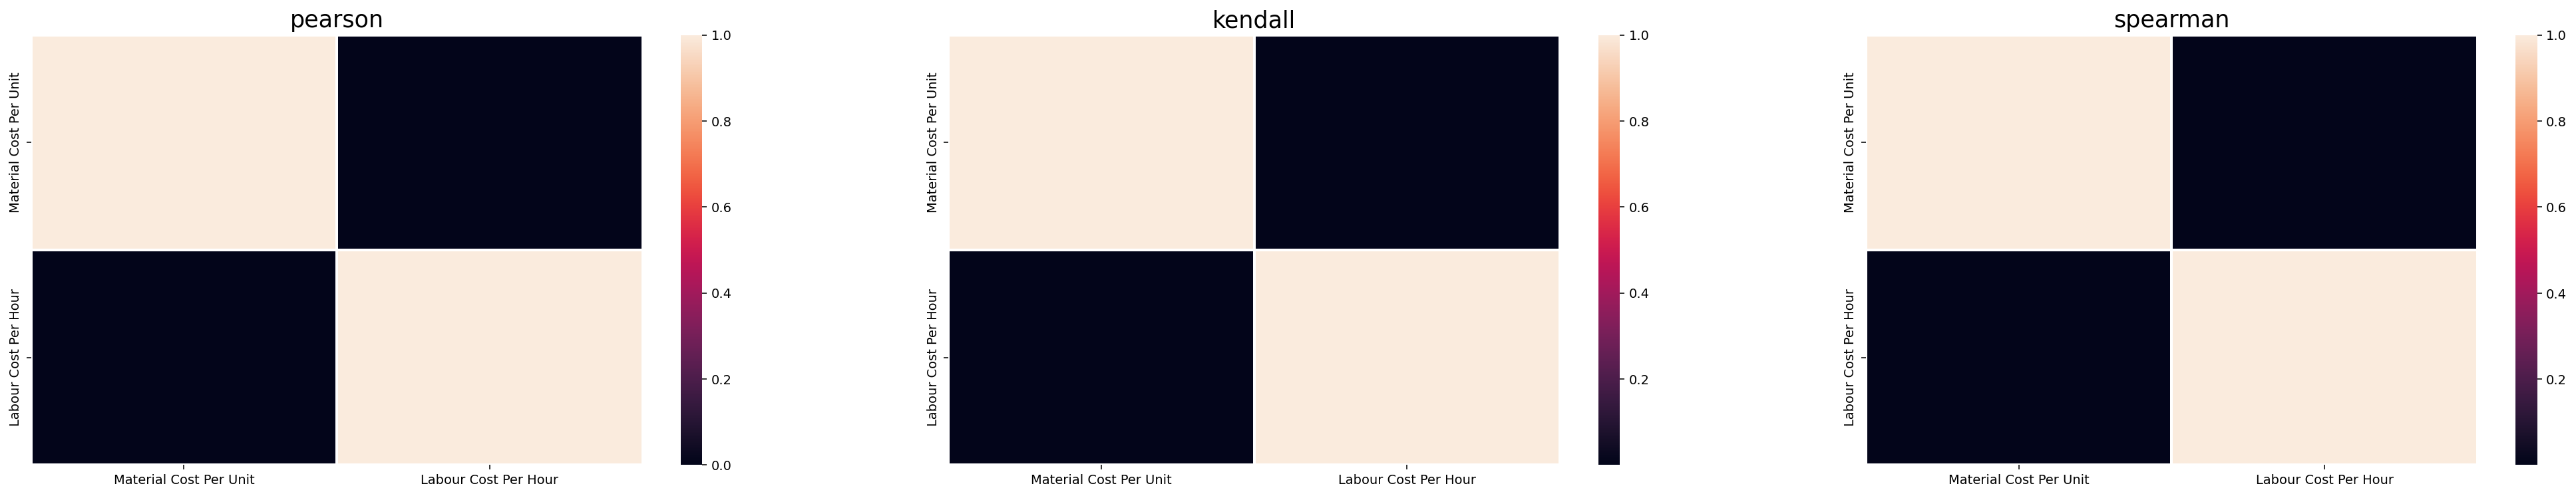

In [33]:
# Plot heatmap for both Materials and Labor costs

plt.figure(figsize = (36, 6), dpi = 140)
for j, i in enumerate (['pearson','kendall','spearman']):
    plt.subplot(1, 3, j+1)
    correlation = mfg_data[['Material Cost Per Unit', 'Labour Cost Per Hour']].corr(method = i)
    sns.heatmap(correlation, linewidths = 2)
    plt.title(i, fontsize = 18)
    

C:\Users\archi\anaconda3\envs\av\Lib\site-packages\seaborn\relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try scatterplot
  warnings.warn(msg, UserWarning)
C:\Users\archi\anaconda3\envs\av\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 560x840 with 0 Axes>

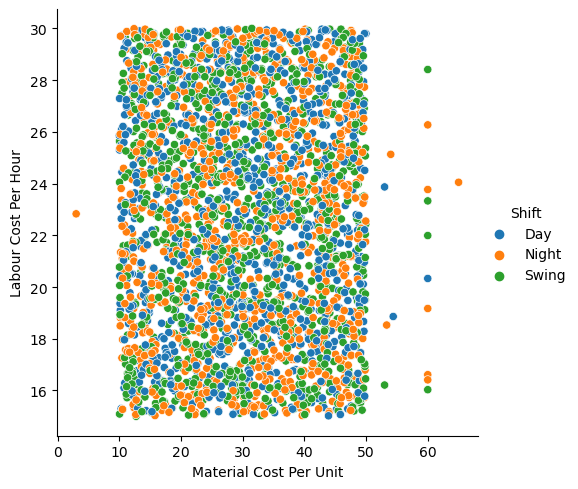

In [34]:
# Also draw scatter plot separately to see the relationships between to costs - Labor and Material.

ax_relplot = plt.figure(figsize = (4, 6), dpi = 140)
sns.relplot(x = mfg_data['Material Cost Per Unit'], y = mfg_data['Labour Cost Per Hour'], data = mfg_data, hue = 'Shift', ax = ax_relplot)

### Findings

- The high and low values for the correlation coefficent is -1 to 1.
- The correlation values between 'Labor Cost Per Hour' and 'Material Cost Per Unit' is negligible i.e. '-0.000004'.
- This correlation value between these two variable is very low or close to zero.
- The scatter graphs shows no patterns between these two variables.
- Low / High 'Material cost' does not have any effect on 'Labor Cost' and vice versa.

#### Problems for EDA dataset**

**4. Efficiency Across Shifts:**

- Do different work shifts (Day, Swing, Night) show differences in how long products take to make or how much energy they use? Compare these shifts to see if one is more efficient or uses less energy.

----------
- Efficiency Across Shifts: Group data by shift and compare the average production time and energy consumption. Use bar charts for visualization and basic statistical tests to check for significant differences.

In [35]:
#--------------------------
# Develop Two sample Z-Test 
#--------------------------
def fn_Two_Sample_ZTest(X1, X2, sigma1, sigma2, N1, N2):
    """
    Function performance 2-Sample Z-Test.
    Input: Mean, Sigma, #of Observations
    Return: p-value as per 2-Sample Z-Test
    """
    from numpy import sqrt, abs, round
    from scipy.stats import norm, stats
    
    sigma = np.sqrt(sigma1**2/N1 + sigma2**2/N2) 
    z = (X1 - X2)/sigma
    
    p_value = 2*(1 - norm.cdf(abs(z)))
    
    return p_value

In [36]:
#--------------------------
# Develop Two sample T-Test 
#--------------------------
def fn_Two_Sample_TTest(X1, X2, sigma1, sigma2, n1, n2):
    """
    Function performance 2-Sample T-Test.
    Input: Mean, Sigma, #of Observations
    Return: p-value as per 2-Sample T-Test
    """
    
    from numpy import sqrt, abs, round
    from scipy.stats import t as t_dist
    
    ovr_sd = sqrt(sigma1**2/n1 + sigma2**2/n2)
    t = (X1 - X2)/ovr_sd
    df = n1+n2-2
    pval = 2*(1 - t_dist.cdf(abs(t),df))
    
    return pval

In [37]:
# Perform Bi-Variate Analysis using 'Shift' categories 
# Measure separately against 'Production Time Hours' and 'Energy Consumption'

def fn_Bivariate_cont_cat(data, cont, cat, cat_v1, cat_v2):
    x1 = mfg_data[cont][mfg_data[cat] == cat_v1]
    x2 = mfg_data[cont][mfg_data[cat] == cat_v2]
    
    #Compute descriptives
    n1, n2 = x1.shape[0], x2.shape[0]
    m1, m2 = x1.mean(), x2.mean()
    std1, std2 = x1.std(), x2.std()
    
    #Compute p-values
    t_p_val = fn_Two_Sample_TTest(m1, m2, std1, std2, n1, n2)
    z_p_val = fn_Two_Sample_ZTest(m1, m2, std1, std2, n1, n2)
    
    #table
    #table = pd.pivot_table(data=data[data[cat in (cat_v1, cat_v2)]], values=cont, columns=data_cols, aggfunc = np.mean)
    
    #plotting
    plt.figure(figsize = (12,3), dpi=140)
    
    #Plot Barplot
    plt.subplot(1,2,1)
    sns.barplot(data = data, x = [cat_v1, cat_v2], y = [m1, m2])
    
    plt.ylabel('Mean {}'.format(cont), fontsize = 6)
    plt.xlabel('Shift', fontsize = 6)
    plt.tick_params(axis='both', labelsize=5)
    plt.title('t-test p-value = {} \n z-test p-value = {}\n {} '.format(round(t_p_val,6), round(z_p_val,6), ''), fontsize = 6)


#### Part 1. Bivariate Analysis between 'Production Time Hours' vs. 'Shift' Category values

**A**
List of Hypothesis and investigation to perform under this combination.

1. The mean production time between Day and Night Shift is same
2. The mean production time between Day and Swing Shift is same Day
3. The mean production time between Swing and Night Shift is same

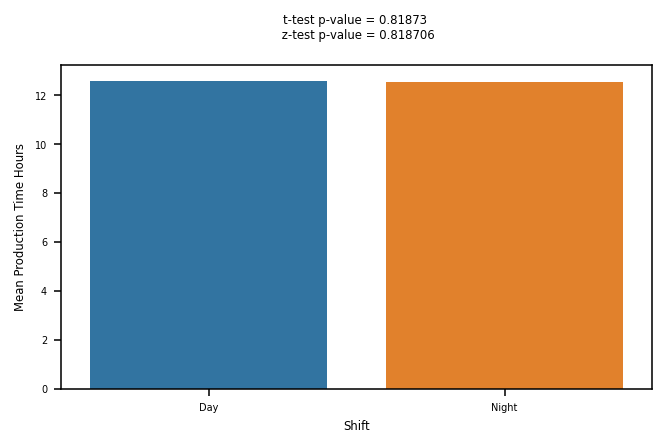

In [38]:
1. # Perform Bivariable Analysis of mean Production Time Hours between Day and Night Shift

fn_Bivariate_cont_cat(mfg_data, 'Production Time Hours', 'Shift', 'Day', 'Night')

**Inferences**

1.    The mean Production Time Hours between Day and Night are not significantly different
2.    The p-value (0.82) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Day and Night.

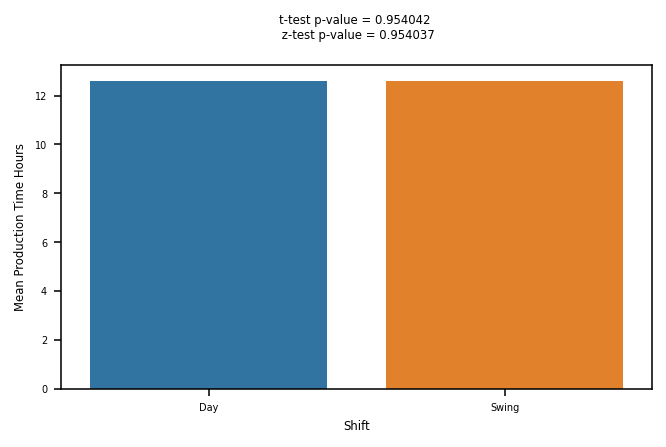

In [39]:
2. # Perform Bivariable Analysis of mean Production Time Hours between Day and Swing Shift

fn_Bivariate_cont_cat(mfg_data, 'Production Time Hours', 'Shift', 'Day', 'Swing')

**Inferences**

1.    The mean Production Time Hours between Day and Night are not significantly different
2.    The p-value (0.95) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Day and Swing.

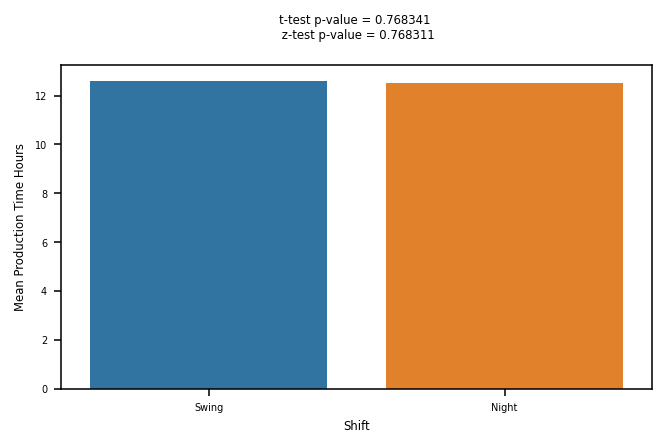

In [40]:
3. # Perform Bivariable Analysis of mean Production Time Hours between Swing and Night Shift

fn_Bivariate_cont_cat(mfg_data, 'Production Time Hours', 'Shift', 'Swing', 'Night')

**Inferences**

1.    The mean Production Time Hours between Day and Night are not significantly different
2.    The p-value (0.76) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Swing and Night.

#### Part 2. Perform Bivariate Analysis between 'Energy Consumption' vs. 'Shift' Cateogry values

**B** List of Hypothesis and investigation to perform under this combination.

1. The average Energy Consumption (kwh) of Day Shift is the same as the Night Shift
2. The average Energy Consumption (kwh) of Day Shift is the same as the Swing Shift
3. The average Energy Consumption (kwh) of Swing Shift is the same as the Night Shift

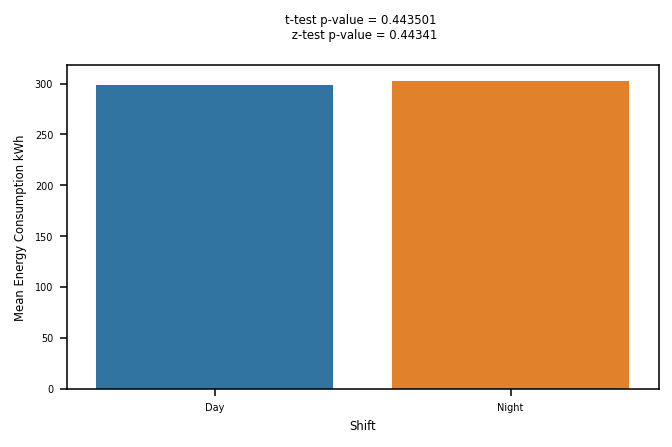

In [41]:
1. # Perform Bivariable Analysis of Mean Energy Consumption (kwh) between Day and Night Shift

fn_Bivariate_cont_cat(mfg_data, 'Energy Consumption kWh', 'Shift', 'Day', 'Night')

**Inferences**

1.    The mean Energy Consumption (kwh) between Day and Night are not significantly different
2.    The p-value (0.44) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Swing and Night.

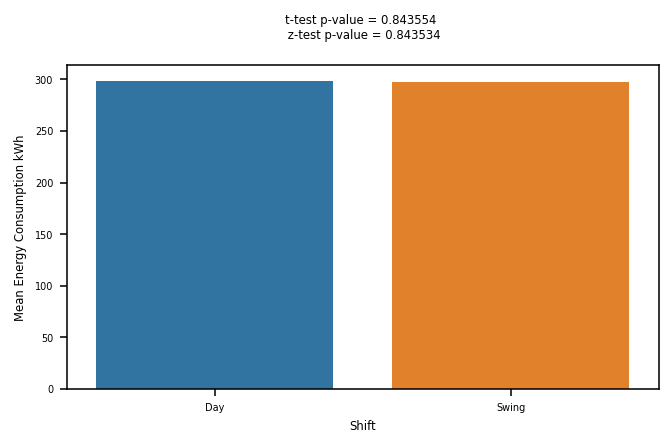

In [42]:
2. # Perform Bivariable Analysis of Mean Energy Consumption (kwh) between Day and Swing Shift

fn_Bivariate_cont_cat(mfg_data, 'Energy Consumption kWh', 'Shift', 'Day', 'Swing')

**Inferences**

1.    The mean Energy Consumption (kwh) between Day and Swing are not significantly different
2.    The p-value (0.84) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Swing and Night.

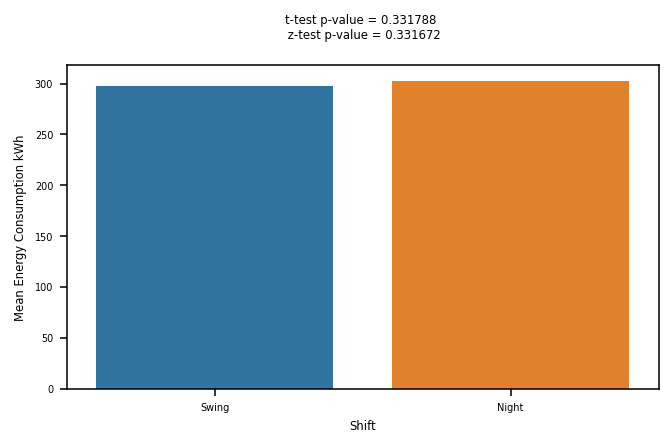

In [43]:
3. # Perform Bivariable Analysis of Mean Energy Consumption (kwh) between Swing and Night Shift

fn_Bivariate_cont_cat(mfg_data, 'Energy Consumption kWh', 'Shift', 'Swing', 'Night')

**Inferences**

1.    The mean Energy Consumption (kwh) between Swing and Night are not significantly different
2.    The p-value (0.33) is greater than alpha value (0.05).


**Result**

We fail to reject the null hypothesis. There is no statistically significant difference 
between two mean values by shift - Swing and Night.

#### Problems for EDA dataset**

**5. Monthly Production Trends:**

- How does the average number of units produced change from month to month? Look for any patterns, such as times of the year when production increases or decreases significantly.

**Approaches Simplified:**

- Monthly Production Trends: Group the data by month and calculate the average units produced for each month. Use line charts to visualize these trends over time.

In [44]:
# Create Year and Month columns from Date Column

mfg_data['Year'] = mfg_data['Date'].dt.year
mfg_data['Month'] = mfg_data['Date'].dt.month
mfg_data['Month_Name'] = mfg_data['Date'].dt.strftime('')
mfg_data.sort_values(by = ['Year', 'Month'], inplace = True)
mfg_data.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,...,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent,Year,Month,Month_Name
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.00,23.42,38.68,15.38,...,1.57,2.34,0.048,1.65,1,22.8,47.2,2020,1,2020-01-01
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.00,7.51,21.35,25.36,...,0.18,1.52,0.030,1.00,1,23.8,37.9,2020,1,2020-01-02
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.00,20.58,47.54,16.46,...,2.88,0.57,0.026,0.26,0,24.5,56.1,2020,1,2020-01-03
3,1900-01-03,2020-01-04,Appliances,11,Day,133,4.61,21.68,40.21,28.70,...,2.23,1.90,0.036,1.00,2,22.3,50.8,2020,1,2020-01-04
4,1900-01-04,2020-01-05,Electronics,14,Night,82,4.61,16.68,38.02,17.20,...,0.02,2.25,0.020,0.67,0,23.4,53.9,2020,1,2020-01-05


In [45]:
# Compute average Units Produced by Year and Month

units_by_year_mon = mfg_data.groupby(['Year','Month', 'Month_Name'])['Units Produced'].mean()
units_by_year_mon = units_by_year_mon.reset_index()
units_by_year_mon.head()

,Year,Month,Month_Name,Units Produced
0,2020,1,2020-01-01,142.0
1,2020,1,2020-01-02,170.0
2,2020,1,2020-01-03,182.0
3,2020,1,2020-01-04,133.0
4,2020,1,2020-01-05,82.0


In [46]:
# Convert the Year and Month columns into String and derive Year-Month

units_by_year_mon['Year'] = units_by_year_mon['Year'].astype(str)
units_by_year_mon['Month'] = units_by_year_mon['Month'].astype(str)
units_by_year_mon['Year-Month'] = units_by_year_mon['Year'] + units_by_year_mon['Month']
units_by_year_mon.head()

,Year,Month,Month_Name,Units Produced,Year-Month
0,2020,1,2020-01-01,142.0,20201
1,2020,1,2020-01-02,170.0,20201
2,2020,1,2020-01-03,182.0,20201
3,2020,1,2020-01-04,133.0,20201
4,2020,1,2020-01-05,82.0,20201


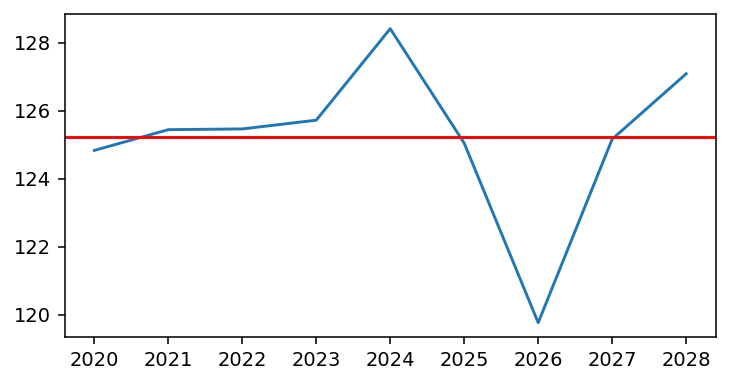

In [47]:
avg_units_by_year = units_by_year_mon.groupby(['Year'])['Units Produced'].mean()
avg_units_by_year.rename('Avg_Units', inplace = True)
x_data = list(avg_units_by_year.index)
y_data = list(avg_units_by_year.values)
y_avg = avg_units_by_year.values.mean()

ax_avg = plt.figure(figsize = (6, 3), dpi=140)
sns.lineplot(x = x_data, y = y_data, data = avg_units_by_year)
plt.axhline(y=y_avg, color="red")

**Findings**

- The production varied from year 2020 to 2028 between units products 124 and 126
- The average production was around 125 
- The production was at its peak of approximate 128 during the year 2024
- The production was at its lowest of approximate 120 during the year 2026

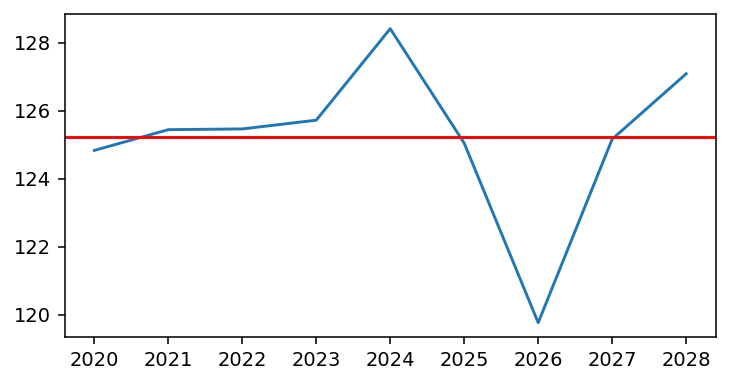

In [48]:
ax_avg = plt.figure(figsize = (6, 3), dpi=140)
sns.lineplot(x = x_data, y = y_data, data = avg_units_by_year)
plt.axhline(y=y_avg, color="red")

#### Create Line Chart to see the relations by Month, Year-Month, and by Year to observe relatonship with Units Produced

C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppData\Local\Temp\ipykernel_3864\3035854829.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\archi\AppDa

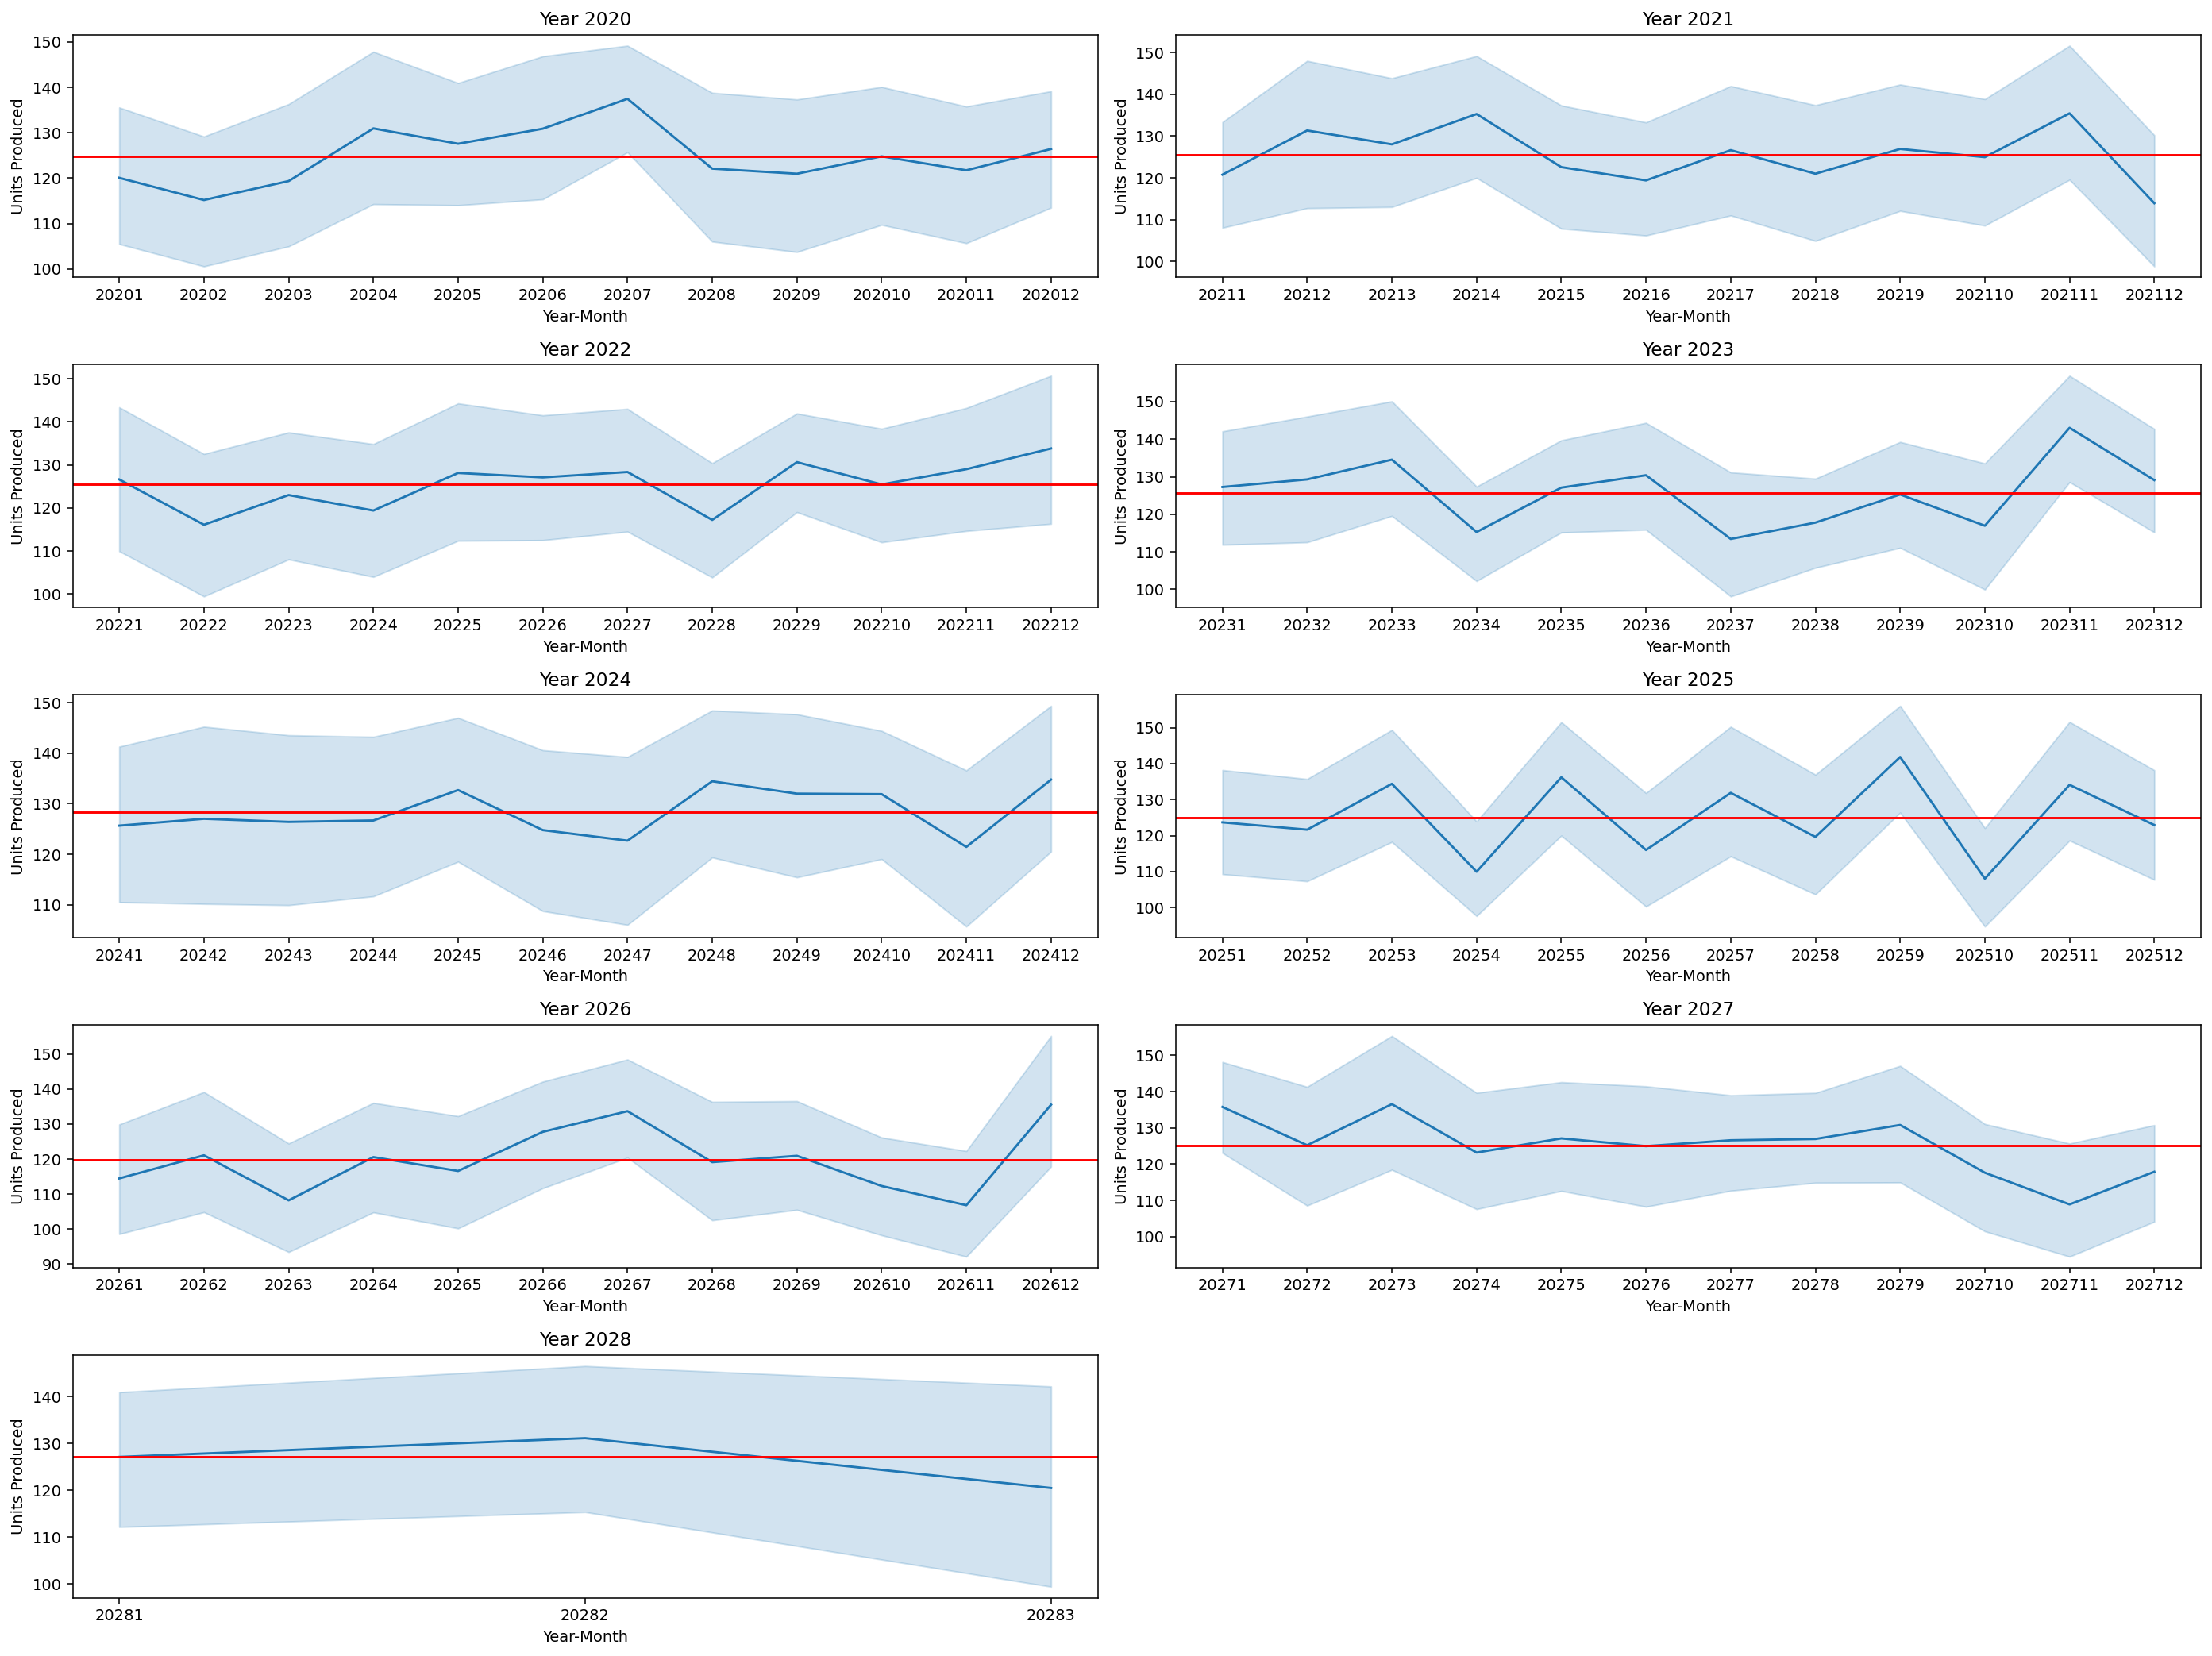

In [49]:
plt.figure(figsize = (20, 15), dpi=140)
unique_years = units_by_year_mon['Year'].unique()
row = 0
for col in unique_years:
    row += 1
    plt.subplot(5, 2, row)
    x_data = units_by_year_mon[units_by_year_mon['Year'] == col]['Year-Month']
    y_data = units_by_year_mon[units_by_year_mon['Year'] == col]['Units Produced']
    y_avg = y_data.mean()
    plt.title('Year {}'.format(col))
    sns.lineplot(x = x_data, y = y_data, data = units_by_year_mon)
    plt.axhline(y=y_avg, color="red")
    plt.tight_layout()

**Inferences**

- There are no noticeable swings of the monthly distribution around mean of the production.
- The distribution is pretty much around mean of the production
- The monthly distribution by year shows no sign or evident pattern of seasonality.

#### Problems for EDA dataset**

**6. Variability in Production by Product Type:**

- Which type of product shows the most variation in how much is produced? Measure this using standard deviation to find out which product type's production volume varies the most.

- Variability in Production by Product Type: Calculate the standard deviation of production volume for each product type to identify which has the most variability.

In [50]:
units_by_prod_type = mfg_data.groupby(['Product Type','Shift'])['Production Volume Cubic Meters'].std()
units_by_prod_type = pd.DataFrame(units_by_prod_type.reset_index())
units_by_prod_type = units_by_prod_type.sort_values(by = ['Product Type', 'Shift'], ascending = [True, True])
units_by_prod_type.head()

,Product Type,Shift,Production Volume Cubic Meters
0,Appliances,Day,0.606002
1,Appliances,Night,0.618366
2,Appliances,Swing,0.583481
3,Automotive,Day,0.575048
4,Automotive,Night,0.576133


<Axes: xlabel='Product Type', ylabel='Production Volume Cubic Meters'>

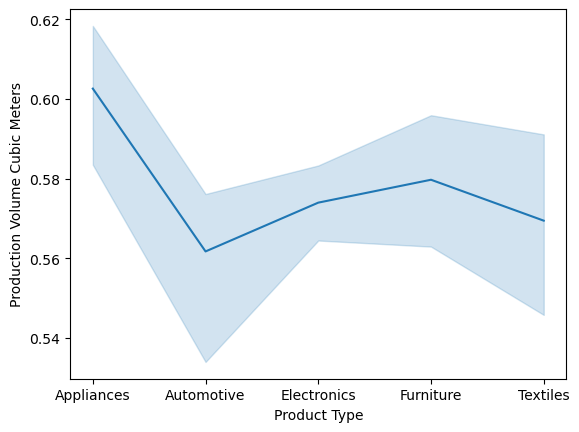

In [51]:
sns.lineplot(x = 'Product Type', y = 'Production Volume Cubic Meters', data = units_by_prod_type)

<Axes: xlabel='Product Type', ylabel='Production Volume Cubic Meters'>

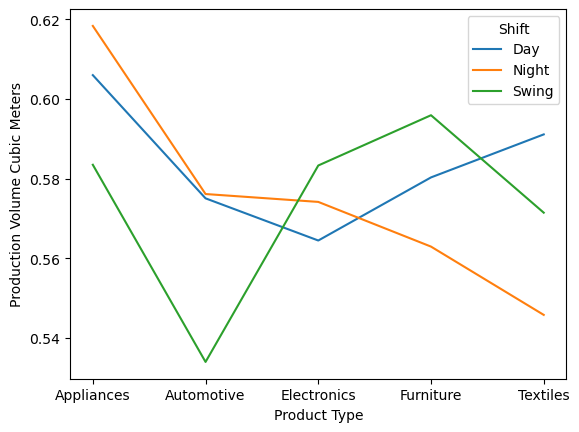

In [52]:
sns.lineplot(x = 'Product Type', y = 'Production Volume Cubic Meters', data = units_by_prod_type, hue = 'Shift')

**Inferences**

- Appliances has the most variability amongst the given Product Type
- Automaotive has the lowest variability amongst the given Product Type
- The Night Shift recorded the highest variability for Appliances and Automotive and the lowest for Furniture and Textiles
- The Day Shift recorded average variability for Appliances and Automotive and the lowest for electronics
- The Swing Shift recorded the lowest variability for Appliances and Automotive and highest for Electronics and Furniture

#### Problems for EDA dataset**

**7. The Role of Operator Count in Efficiency:**

- How does the number of operators affect how many units are produced per hour? Check if having more operators leads to more efficient production.

**Approaches Simplified:**

The Role of Operator Count in Efficiency: Group the data by the number of operators and calculate the average units produced per hour for each group to analyze the impact on efficiency.

In [53]:
mfg_data['Units Produced Per Hour'] = mfg_data['Operator Count'].div(mfg_data['Production Time Hours'])
mfg_data[['Units Produced Per Hour', 'Operator Count', 'Production Time Hours']].head()

,Units Produced Per Hour,Operator Count,Production Time Hours
0,0.042699,1,23.42
1,0.266312,2,7.51
2,0.097182,2,20.58
3,0.138376,3,21.68
4,0.059952,1,16.68


In [54]:
operator_count_efficiency = mfg_data.groupby(['Operator Count'])['Units Produced Per Hour'].mean()
operator_count_efficiency = pd.DataFrame(operator_count_efficiency.reset_index())
operator_count_efficiency.head()

,Operator Count,Units Produced Per Hour
0,1,0.140215
1,2,0.268984
2,3,0.424697
3,4,0.573854


<Axes: xlabel='Operator Count', ylabel='Units Produced Per Hour'>

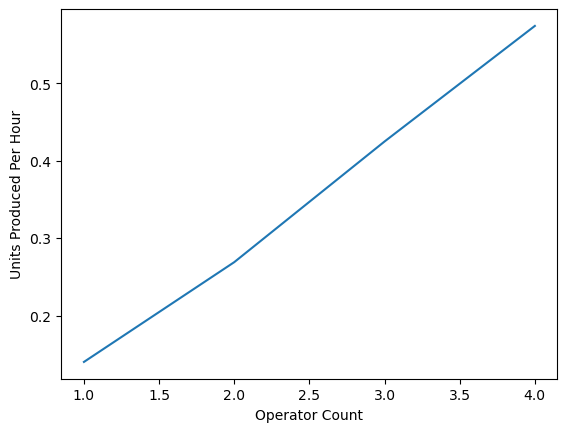

In [55]:
sns.lineplot(x = 'Operator Count', y = 'Units Produced Per Hour', data = operator_count_efficiency)

**Inference**

The upward trend of above line shows clear evidence that an increase in Operator count increases the Units Produced.

#### Problems for EDA dataset**

**8. Identifying the Machine with Most Defects:**

- Which machine tends to produce the most defects, considering the total units it produces? Calculate the defect rate as defects per 100 units to make comparisons easier.

In [56]:
mfg_data['Defect Rate'] = mfg_data['Defects'].div((mfg_data['Units Produced'] / 100))

<Axes: xlabel='Machine ID', ylabel='Defect Rate'>

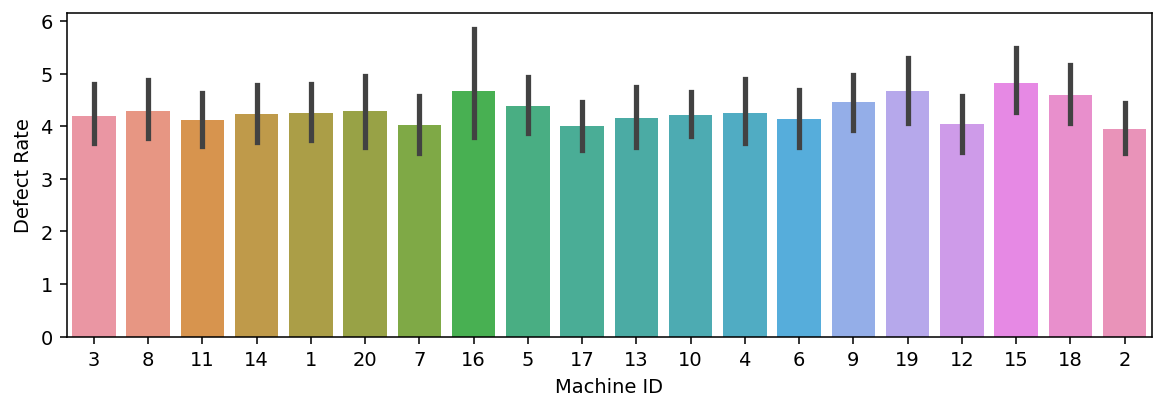

In [71]:
plt.figure(figsize = (10, 3), dpi=140)
#mfg_data = mfg_data.sort_values(by = ['Defect Rate', 'Machine ID'], ascending = (False, True))
x_data = mfg_data['Machine ID'].astype(str)
y_data = mfg_data['Defect Rate']

sns.barplot(data = mfg_data, x = x_data, y = y_data)

**Inferences**

Machine ID 15 seems to produce the most defect rate

#### Problems for EDA dataset**

**9. How Environment Affects Scrap Rate:**

- Do changes in temperature and humidity affect how much scrap (waste) is produced? Analyze the data to see if there's a correlation between environmental conditions and scrap rate.

In [85]:
environ_affect = mfg_data[['Average Temperature C', 'Average Humidity Percent', 'Scrap Rate']].corr(method = 'pearson').abs().unstack()
environ_affect = environ_affect.sort_values(kind = 'quicksort', ascending = False)
environ_affect = pd.DataFrame(environ_affect, columns = ['Pearson Correlation']).reset_index()
environ_affect[environ_affect['Pearson Correlation'] < 1]

,level_0,level_1,Pearson Correlation
3,Average Humidity Percent,Scrap Rate,0.029378
4,Scrap Rate,Average Humidity Percent,0.029378
5,Average Temperature C,Scrap Rate,0.020510
6,Scrap Rate,Average Temperature C,0.020510
7,Average Temperature C,Average Humidity Percent,0.006756
8,Average Humidity Percent,Average Temperature C,0.006756


<Axes: >

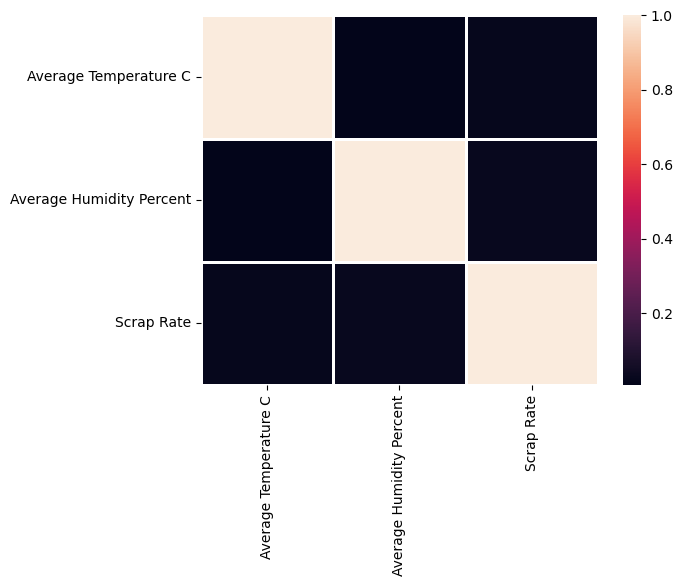

In [86]:
environ_affect = mfg_data[['Average Temperature C', 'Average Humidity Percent', 'Scrap Rate']].corr(method = 'pearson')
sns.heatmap(environ_affect, linewidths = 2)

**Inferene**

There is no correlation of Temperature and Humidity on Scrape Rate.